Intoduction - These scripts help with visualizing a polynomial's complex zeros in the unit disc. In particular, we will create an interactive environment where we can manipulate the zeros of a polynomial in real time and see how this effects the zeros of the derivative. 

Motivation - The famous Sendov Conjecture states that if a polynomial has all it's zeros in the unit disc, then every root should have a zero of the derivative within one unit. This unproved statement was the motivation for building a script that can visulize the zeros continously. In general, the fact that such a simple statement is still unproven demonstrates how little we understand the interactions between a polynomials zeros and it's derivative. Hopefully this script can shed some light on how polynomial zeros. 

Root/Zero - A complex number, c, such that p(c) == 0. 

Convex Hull - The smallest convex polygon such that all the zeros of p are located inside the polygon. 

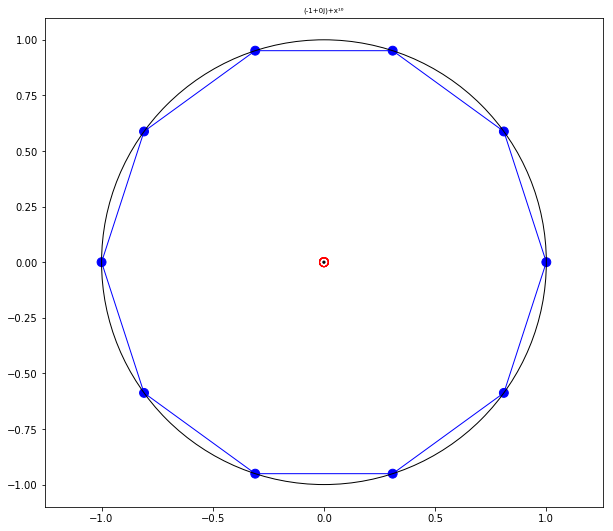

In [11]:
import matplotlib.pyplot as plt
from matplotlib      import patches
from polynomials     import Poly,prod,root_coor,x
from draggableobject import DraggableObjects

def ConvexHullUpdater(DraggableObjectsClass):
    #Since DOC.clickable_objs is contained in DOC.objs_to_update then DOC.clicked_obj is one of the roots. 
    original_coors         = DOC.objs_to_update_data[DOC.clicked_obj]
    clicked_root_new_x     = original_coors[0] + DOC.new_mouse.xdata - DOC.old_mouse.xdata
    clicked_root_new_y     = original_coors[1] + DOC.new_mouse.ydata - DOC.old_mouse.ydata
    DOC.clicked_obj.center = (clicked_root_new_x, clicked_root_new_y)
    #Now update the polynomial, and use that to update the convexhulls and roots. 
    poly = prod([(x-complex(*r.center)) for r in roots])
    plt.title(poly,fontsize=7)
    for old_r,new_r in zip(d_roots,root_coor(poly.derivative().roots())):
        old_r.center = new_r
    convexhull.set_xy(root_coor(poly.convex_hull()))
    d_convexhull.set_xy(root_coor(poly.derivative().convex_hull()))
    return True

#Create the polynomial information to be updated and changed. 
number_of_roots = 10

poly         = Poly([-1]+[0]*(number_of_roots-1)+[1])
roots        = [patches.Circle(r,radius=0.02,color='blue') for r in root_coor(poly.roots())]
convexhull   = patches.Polygon(root_coor(poly.convex_hull()),fill=False,color='blue')
d_roots      = [patches.Circle(r,radius=0.02,color='red',fill=False) for r in root_coor(poly.derivative().roots())]
d_convexhull = patches.Polygon(root_coor(poly.derivative().convex_hull()),fill=False,color='red')

#Plot all the objects above into an axes and create/connect a DraggbleObjects 
#class to the axes. Create the unit disc and orgin. Plot the window.  
fig,ax = plt.subplots(figsize=(10,9))
for obj in [convexhull,d_convexhull]+roots+d_roots: 
    ax.add_patch(obj)
DOC = DraggableObjects(ax, roots, [convexhull,d_convexhull]+roots+d_roots, ConvexHullUpdater)
ax.add_patch(patches.Circle((0,0),radius=1,fill=False))
ax.add_patch(patches.Circle((0,0),radius=0.005,color='black'))
ax.axis('equal')
plt.title(poly,fontsize=7)
plt.show()